In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 36
page_size = 100



header = []
reviews = []
rating = []

star = []
star_labes = []

tables = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Read tables
    tables.append(pd.read_html(response.text, index_col=0))

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')

    for para in parsed_content.find_all("h2", {"class": "text_header"}):
        header.append(para.get_text())  

    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    for para in parsed_content.find_all("span", {"itemprop": "ratingValue"}):
        rating.append(para.get_text())


    print(f"   ---> {len(reviews)} total reviews")
    print(f"   ---> {len(header)} total header")
    print(f"   ---> {len(rating)} total rating")

Scraping page 1
   ---> 100 total reviews
   ---> 100 total header
   ---> 101 total rating
Scraping page 2
   ---> 200 total reviews
   ---> 200 total header
   ---> 202 total rating
Scraping page 3
   ---> 300 total reviews
   ---> 300 total header
   ---> 303 total rating
Scraping page 4
   ---> 400 total reviews
   ---> 400 total header
   ---> 404 total rating
Scraping page 5
   ---> 500 total reviews
   ---> 500 total header
   ---> 505 total rating
Scraping page 6
   ---> 600 total reviews
   ---> 600 total header
   ---> 606 total rating
Scraping page 7
   ---> 700 total reviews
   ---> 700 total header
   ---> 707 total rating
Scraping page 8
   ---> 800 total reviews
   ---> 800 total header
   ---> 808 total rating
Scraping page 9
   ---> 900 total reviews
   ---> 900 total header
   ---> 909 total rating
Scraping page 10
   ---> 1000 total reviews
   ---> 1000 total header
   ---> 1010 total rating
Scraping page 11
   ---> 1100 total reviews
   ---> 1100 total header
   ---

In [ ]:
rating_cleaned = []
for i in rating:
  if i != '\n\t\t\t\t\t\t\t\t\t\t\t\t\t5':
    rating_cleaned.append(i)

In [ ]:
df = pd.DataFrame()
df["header"] = header
df["reviews"] = reviews
df["rating"] = rating_cleaned


df.head()

,header,reviews,rating
0,"""the worst airline experience I've ever had to...",Not Verified | My itinerary was supposed to b...,1
1,"""Service was good""",✅ Trip Verified | Busy day at LHR and flight ...,9
2,"""Last time I will fly British Airways""",✅ Trip Verified | Worst seats I have ever enco...,2
3,"""cancel your flight without notice""",Not Verified | Top Ten REASONS to not use Brit...,1
4,"""flights changed with no cost""",Not Verified | Easy check in on the way to He...,10


In [ ]:
tables[0][1].transpose()

,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended
1,Solo Leisure,Economy Class,Las Vegas to Venice,May 2023,12345,12345,12345,12345,12345,12345,12345,no


In [ ]:
flat_list = []
for sublist in tables:
    for item in sublist:
        flat_list.append(item)

In [ ]:
# List to store transposed tables
transposed_tables = []

# Iterate over the tables and transpose them
for table in flat_list:
    transposed_tables.append(table.transpose())

# Concatenate the transposed tables along axis 0
result = pd.concat(transposed_tables, axis=0)

In [ ]:
result

,Food & Beverages,Inflight Entertainment,Seat Comfort,Staff Service,Value for Money,Type Of Traveller,Seat Type,Route,Date Flown,Cabin Staff Service,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Aircraft
1,12345,12345,12345,12345.0,12345.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12345,12345,12345,NaN,NaN,Solo Leisure,Economy Class,Las Vegas to Venice,May 2023,12345,12345,12345,12345,no,NaN
1,12345,12345,12345,NaN,NaN,Family Leisure,Premium Economy,London to New York,May 2023,12345,12345,12345,12345,yes,Boeing 777-300
1,NaN,12345,12345,NaN,NaN,Couple Leisure,Economy Class,Lisbon to London,May 2023,12345,12345,12345,12345,no,A320
1,12345,12345,12345,NaN,NaN,Couple Leisure,Premium Economy,Dallas to Madrid via London,May 2023,12345,12345,12345,12345,no,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,12345,NaN,12345,NaN,NaN,Business,Business Class,London to Frankfurt,July 2018,12345,12345,NaN,12345,no,NaN
1,12345,NaN,12345,NaN,NaN,Solo Leisure,Business Class,Gatwick to Malaga,July 2018,12345,12345,NaN,12345,yes,A321
1,12345,12345,12345,NaN,NaN,Couple Leisure,Business Class,Bermuda to Gatwick,May 2018,12345,12345,NaN,12345,yes,Boeing 777-200
1,12345,12345,12345,NaN,NaN,Business,Economy Class,Aberdeen to Boston via London,July 2018,12345,12345,12345,12345,yes,NaN


In [ ]:
results2 = result.dropna(subset=["Route", "Date Flown", "Cabin Staff Service", "Ground Service", "Wifi & Connectivity", "Value For Money"], how='all')
results3 = results2.drop(columns = ["Food & Beverages", "Inflight Entertainment", 
                                    "Seat Comfort", "Staff Service", "Value for Money",
                                    "Cabin Staff Service", "Wifi & Connectivity", "Ground Service", "Value For Money"])
results4 = results3.reset_index()
results4 = results4.drop(columns = "index")
results4

,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft
0,Solo Leisure,Economy Class,Las Vegas to Venice,May 2023,no,NaN
1,Family Leisure,Premium Economy,London to New York,May 2023,yes,Boeing 777-300
2,Couple Leisure,Economy Class,Lisbon to London,May 2023,no,A320
3,Couple Leisure,Premium Economy,Dallas to Madrid via London,May 2023,no,NaN
4,Couple Leisure,Economy Class,London to Valencia,March 2023,yes,NaN
...,...,...,...,...,...,...
995,Business,Business Class,London to Frankfurt,July 2018,no,NaN
996,Solo Leisure,Business Class,Gatwick to Malaga,July 2018,yes,A321
997,Couple Leisure,Business Class,Bermuda to Gatwick,May 2018,yes,Boeing 777-200
998,Business,Economy Class,Aberdeen to Boston via London,July 2018,yes,NaN


In [ ]:
df2 = df.join(results4)
df2

,header,reviews,rating,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft
0,"""the worst airline experience I've ever had to...",Not Verified | My itinerary was supposed to b...,1,Solo Leisure,Economy Class,Las Vegas to Venice,May 2023,no,NaN
1,"""Service was good""",✅ Trip Verified | Busy day at LHR and flight ...,9,Family Leisure,Premium Economy,London to New York,May 2023,yes,Boeing 777-300
2,"""Last time I will fly British Airways""",✅ Trip Verified | Worst seats I have ever enco...,2,Couple Leisure,Economy Class,Lisbon to London,May 2023,no,A320
3,"""cancel your flight without notice""",Not Verified | Top Ten REASONS to not use Brit...,1,Couple Leisure,Premium Economy,Dallas to Madrid via London,May 2023,no,NaN
4,"""flights changed with no cost""",Not Verified | Easy check in on the way to He...,10,Couple Leisure,Economy Class,London to Valencia,March 2023,yes,NaN
...,...,...,...,...,...,...,...,...,...
995,"""lounges in Heathrow are overcrowded""",✅ Trip Verified | London to Frankfurt. I need...,1,Business,Business Class,London to Frankfurt,July 2018,no,NaN
996,"""was nicely impressed""",✅ Trip Verified | Gatwick to Malaga. When book...,9,Solo Leisure,Business Class,Gatwick to Malaga,July 2018,yes,A321
997,"""pole vault over passenger's legs""",✅ Trip Verified | Bermuda to Gatwick. Usual w...,7,Couple Leisure,Business Class,Bermuda to Gatwick,May 2018,yes,Boeing 777-200
998,"""seats weren't wide enough""",✅ Trip Verified | Aberdeen to Boston via Lond...,6,Business,Economy Class,Aberdeen to Boston via London,July 2018,yes,NaN


In [ ]:
df2.isnull().sum()

header                 0
reviews                0
rating                 0
Type Of Traveller      1
Seat Type              0
Route                  3
Date Flown             0
Recommended            0
Aircraft             429
dtype: int64

In [ ]:
df2.to_csv("BA_reviews.csv")

In [ ]:
# Removing and Cleaning Text

df2["reviews"] = df2["reviews"].str.split("|").str[1]
df2.head()

,header,reviews,rating,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft
0,"""the worst airline experience I've ever had to...",My itinerary was supposed to be Las Vegas-Ch...,1,Solo Leisure,Economy Class,Las Vegas to Venice,May 2023,no,NaN
1,"""Service was good""",Busy day at LHR and flight full. Lounge crow...,9,Family Leisure,Premium Economy,London to New York,May 2023,yes,Boeing 777-300
2,"""Last time I will fly British Airways""",Worst seats I have ever encountered in econom...,2,Couple Leisure,Economy Class,Lisbon to London,May 2023,no,A320
3,"""cancel your flight without notice""",Top Ten REASONS to not use British Airways To...,1,Couple Leisure,Premium Economy,Dallas to Madrid via London,May 2023,no,NaN
4,"""flights changed with no cost""",Easy check in on the way to Heathrow. The fl...,10,Couple Leisure,Economy Class,London to Valencia,March 2023,yes,NaN


In [ ]:
df2["Recommended"].value_counts()/len(df2)

no     0.639
yes    0.361
Name: Recommended, dtype: float64

## Scraping data

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests as rq

global rating, Aircraft, Class, Travel_type, Route, Date, comfort, staff, food, entertainment, wifi, ground_service, vfm, recommend

verified=[]
rating=[]
feedback=[]
Aircraft=[]
Class=[]
Travel_type=[]
Route=[]
Date=[]
comfort=[]
staff=[]
food=[]
entertainment=[]
wifi=[]
ground_service=[]
vfm=[]
recommend=[]


def value_fetcher(soup):
    rating.append(np.nan)
    Aircraft.append(np.nan)
    Class.append(np.nan)
    Travel_type.append(np.nan)
    Route.append(np.nan)
    Date.append(np.nan)
    comfort.append(np.nan)
    staff.append(np.nan)
    food.append(np.nan)
    entertainment.append(np.nan)
    wifi.append(np.nan)
    ground_service.append(np.nan)
    vfm.append(np.nan)
    recommend.append(np.nan)
    
    for row in soup.find_all('tr'):
        header=row.find('td',class_='review-rating-header').text
        value=row.find('td',class_='review-value')
        if header=='Aircraft':
            Aircraft[-1]=value.text
        elif header=='Type Of Traveller':
            Travel_type[-1]=value.text
        elif header=='Seat Type':
            Class[-1]=value.text
        elif header=='Route':
            Route[-1]=value.text
        elif header=='Date Flown':
            Date[-1]=value.text
        elif header=='Seat Comfort':
            comfort[-1]=len(row.find_all('span',class_='star fill'))
        elif header=='Cabin Staff Service':
            staff[-1]=len(row.find_all('span',class_='star fill'))
        elif header=='Food & Beverages':
            food[-1]=len(row.find_all('span',class_='star fill'))
        elif header=='Inflight Entertainment':
            entertainment[-1]=len(row.find_all('span',class_='star fill'))
        elif header=='Ground Service':
            ground_service[-1]=len(row.find_all('span',class_='star fill'))
        elif header=='Value For Money':
            vfm[-1]=len(row.find_all('span',class_='star fill'))
        elif header=='Recommended':
            recommend[-1]=value.text
        elif header=='Wifi & Connectivity':
            wifi[-1]=len(row.find_all('span',class_='star fill'))


def fetcher(soup,tag,key,value):
    if soup.find(tag,{key:value}):
        return soup.find(tag,{key:value}).text
    return np.nan


for i in range(1,344):
    url=f'https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/'
    page=rq.get(url).text
    soup=BeautifulSoup(page,'lxml')
    articles= soup.find_all('article',{'itemprop':'review'})
    for article in articles:
        rating.append(fetcher(article,'span','itemprop','ratingValue'))
        div=article.find('div',class_='tc_mobile')
        content=(div.find('div',class_='text_content').text.split('|'))
        if len(content)==2:
            verification,review=content
        else:
            verification =np.nan
            review=content[0]
        verified.append(verification)
        feedback.append(review)
        table=div.find('table',class_='review-ratings')
        value_fetcher(table)


In [ ]:
df=pd.DataFrame({'status':verified,'aircraft':Aircraft,'travel_type':Travel_type,'travel_class':Class,'route':Route,'date':Date,'seating_comfort':comfort,'staff_service':staff,'food_quality':food,'entertainment':entertainment,'wifi':wifi,'ground_service':ground_service,'value_for_money':vfm,'recommended':recommend,'overall_rating':rating[::2],'review':feedback})

In [ ]:
df.to_csv("BA_reviews2.csv")

https://www.kaggle.com/code/minnikeswarrao/web-scraping-on-skytrax-com/notebook for the web scraping tool

In [ ]:
df.head()

,status,aircraft,travel_type,travel_class,route,date,seating_comfort,staff_service,food_quality,entertainment,wifi,ground_service,value_for_money,recommended,overall_rating,review
0,Not Verified,NaN,Solo Leisure,Economy Class,Las Vegas to Venice,May 2023,1.0,1.0,1.0,1.0,1.0,1.0,1,no,1,My itinerary was supposed to be Las Vegas-Ch...
1,✅ Trip Verified,Boeing 777-300,Family Leisure,Premium Economy,London to New York,May 2023,4.0,4.0,3.0,5.0,5.0,4.0,4,yes,9,Busy day at LHR and flight full. Lounge crow...
2,✅ Trip Verified,A320,Couple Leisure,Economy Class,Lisbon to London,May 2023,1.0,3.0,NaN,1.0,1.0,1.0,2,no,2,Worst seats I have ever encountered in econom...
3,Not Verified,NaN,Couple Leisure,Premium Economy,Dallas to Madrid via London,May 2023,1.0,1.0,1.0,1.0,1.0,1.0,1,no,1,Top Ten REASONS to not use British Airways To...
4,Not Verified,NaN,Couple Leisure,Economy Class,London to Valencia,March 2023,4.0,4.0,NaN,NaN,NaN,5.0,4,yes,10,Easy check in on the way to Heathrow. The fl...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   status           2032 non-null   object 
 1   aircraft         1851 non-null   object 
 2   travel_type      2786 non-null   object 
 3   travel_class     3429 non-null   object 
 4   route            2781 non-null   object 
 5   date             2778 non-null   object 
 6   seating_comfort  3327 non-null   float64
 7   staff_service    3317 non-null   float64
 8   food_quality     3081 non-null   float64
 9   entertainment    2365 non-null   float64
 10  wifi             558 non-null    float64
 11  ground_service   2716 non-null   float64
 12  value_for_money  3430 non-null   int64  
 13  recommended      3430 non-null   object 
 14  overall_rating   3426 non-null   object 
 15  review           3430 non-null   object 
dtypes: float64(6), int64(1), object(9)
memory usage: 428.9+ KB


In [ ]:
df.isnull().sum()

status             1398
aircraft           1579
travel_type         644
travel_class          1
route               649
date                652
seating_comfort     103
staff_service       113
food_quality        349
entertainment      1065
wifi               2872
ground_service      714
value_for_money       0
recommended           0
overall_rating        4
review                0
dtype: int64

In [ ]:
df = df.fillna(value=np.nan)

In [ ]:
df.describe()

,seating_comfort,staff_service,food_quality,entertainment,wifi,ground_service,value_for_money
count,3327.000000,3317.000000,3081.000000,2365.000000,558.000000,2716.000000,3430.000000
mean,2.878870,3.261079,2.713405,2.653277,1.935484,2.825479,2.702041
std,1.356947,1.484937,1.439915,1.407270,1.363593,1.449363,1.469778
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,3.000000
75%,4.000000,5.000000,4.000000,4.000000,3.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


**Observations**
- Average seating comfort is 2.88/5 
- Staff service 3.26
- Food quality 2.71
- Entertainment 

In [ ]:
import matplotlib.pyplot as plt

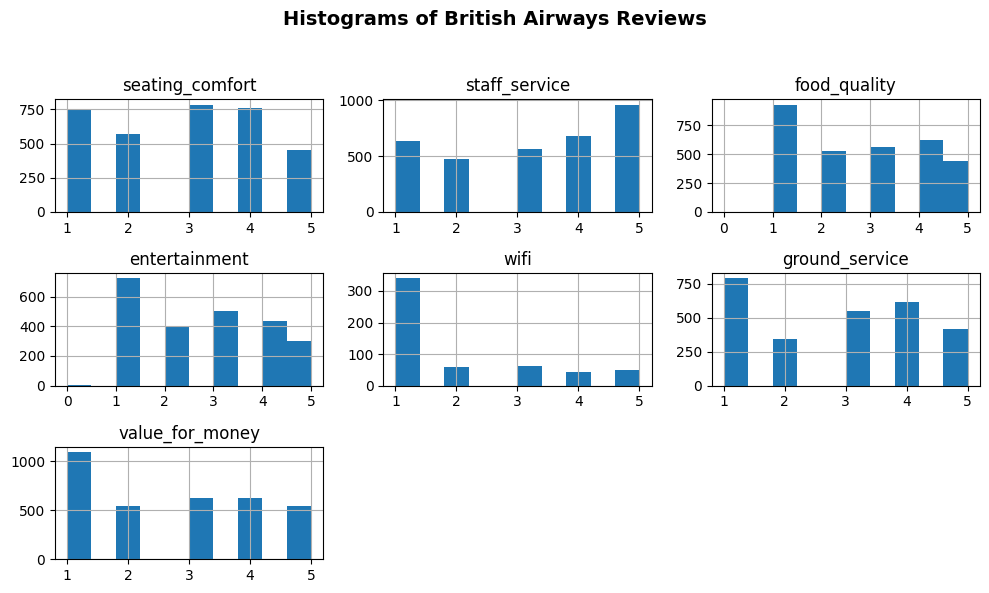

In [ ]:
# Plotting histograms
df.hist(bins=10, edgecolor='black', figsize=(10, 6))

# Adding titles and labels
plt.suptitle('Histograms of British Airways Reviews', fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjusting layout and spacing
plt.show()

In [ ]:
df["overall_rating"].astype(int)

ValueError: ignored